# WiDS - Base Regression Model

## Introduction

#### In this notebook, I will be implementing Regression Models to predict the site-wise electricity consumption. The notebook has been divided into the following sections:
    1. Undedrstanding the Data
    2. EDA
    3. Preprocessing
    4. Key takeaways from the analysis
    5. Summary of Data Cleaning steps
    6. Modelling
    7. Key Findings
    8. Future Plan of Action

# 1. Understanding the Data

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from simple_colors import *
import warnings
warnings.simplefilter('ignore')

%matplotlib inline

### Read train and test files

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [3]:
train_df.shape

(75757, 64)

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [5]:
train_df.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,...,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,...,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,...,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403,21869.306509
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,...,72.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,88.000000,54.528601,18939.000000
50%,5.000000,9.136700e+04,1951.000000,67.000000,25.000000,11.000000,34.451613,59.000000,9.000000,34.107143,...,84.000000,12.000000,0.000000,0.000000,1.000000,1.000000,1.000000,104.000000,75.293716,37878.000000
75%,6.000000,1.660000e+05,1977.000000,85.000000,42.700000,13.000000,37.322581,62.000000,20.000000,40.879310,...,97.000000,17.000000,0.000000,0.000000,1.000000,1.000000,1.000000,131.000000,97.277534,56817.000000
max,6.000000,6.385382e+06,2015.000000,100.000000,1924.500000,49.000000,64.758065,91.000000,48.000000,65.107143,...,260.000000,185.000000,119.000000,16.000000,360.000000,360.000000,23.300000,311.000000,997.866120,75756.000000


In [6]:
train_df.dtypes.value_counts()

int64      37
float64    24
object      3
dtype: int64

In [7]:
train_df.dtypes

Year_Factor                    int64
State_Factor                  object
building_class                object
facility_type                 object
floor_area                   float64
                              ...   
direction_peak_wind_speed    float64
max_wind_speed               float64
days_with_fog                float64
site_eui                     float64
id                             int64
Length: 64, dtype: object

In [8]:
cat_features = train_df.select_dtypes(include=['object']).columns.to_list()

In [9]:
cat_features

['State_Factor', 'building_class', 'facility_type']

In [10]:
num_features = [i for i in train_df.columns if i not in cat_features]

# 2. EDA

    1. Analyse the categorical features of train and test sets
    2. Visualize the spread of the data
    3. Encoding
    4. Group the temperature columns together and try to perform feature engineering
    5. days_below and days_above (see whether we can bring down the number of features)
    6. Analyse the outliers
    7. Drop the unnececssary columns
    8. Analyse the distribution of the features (whether they are normally distributed)
    9. Handle missing values

### Creating a separate dataframe with just the categorical features and the target variable

In [11]:
cat_df = train_df.loc[:, cat_features]

In [12]:
cat_df['site_eui'] = train_df['site_eui']

In [13]:
cat_df

,State_Factor,building_class,facility_type,site_eui
0,State_1,Commercial,Grocery_store_or_food_market,248.682615
1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,26.500150
2,State_1,Commercial,Retail_Enclosed_mall,24.693619
3,State_1,Commercial,Education_Other_classroom,48.406926
4,State_1,Commercial,Warehouse_Nonrefrigerated,3.899395
...,...,...,...,...
75752,State_11,Commercial,Office_Uncategorized,132.918411
75753,State_11,Residential,5plus_Unit_Building,39.483672
75754,State_11,Commercial,Commercial_Other,48.404398
75755,State_11,Commercial,Commercial_Other,592.022750


In [14]:
for i in cat_df.columns:
    if i != 'site_eui':
        print(blue(i.upper(), ['bold', 'underlined']))
        print(cat_df[i].value_counts(), '\n')

STATE_FACTOR
State_6     50840
State_11     6412
State_1      5618
State_2      4871
State_4      4300
State_8      3701
State_10       15
Name: State_Factor, dtype: int64 

BUILDING_CLASS
Residential    43558
Commercial     32199
Name: building_class, dtype: int64 

FACILITY_TYPE
Multifamily_Uncategorized                    39455
Office_Uncategorized                         12512
Education_Other_classroom                     3860
Lodging_Hotel                                 2098
2to4_Unit_Building                            1893
Commercial_Other                              1744
5plus_Unit_Building                           1273
Warehouse_Nonrefrigerated                     1255
Retail_Uncategorized                          1130
Education_College_or_university               1056
Nursing_Home                                   772
Education_Uncategorized                        709
Mixed_Use_Commercial_and_Residential           672
Lodging_Dormitory_or_fraternity_sorority       669
Ware

Using the countplot we can see the distribution of the groups within a particular feature. As shown below:

    1. state_6 has the most number of occurances int the state_factor. 
    2. Multifamily_Uncategorized has dominated the facility_type feature. 
    3. Almost equal distribution of commercial and residential buildings in our training dataset.

In [15]:
def cat_plots(df):
    for i in cat_features:
        plt.figure(figsize=(20,5))
        sns.countplot(df[i])
        plt.xticks(rotation=90)
        plt.show()

### Training Set 

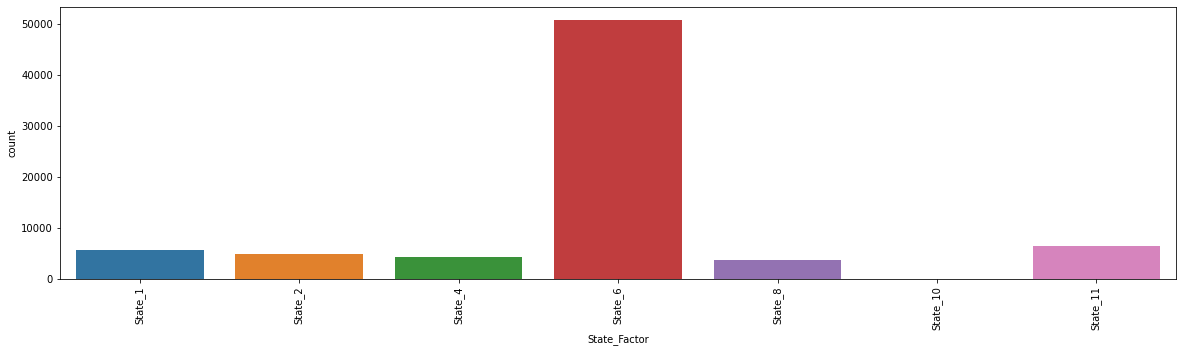

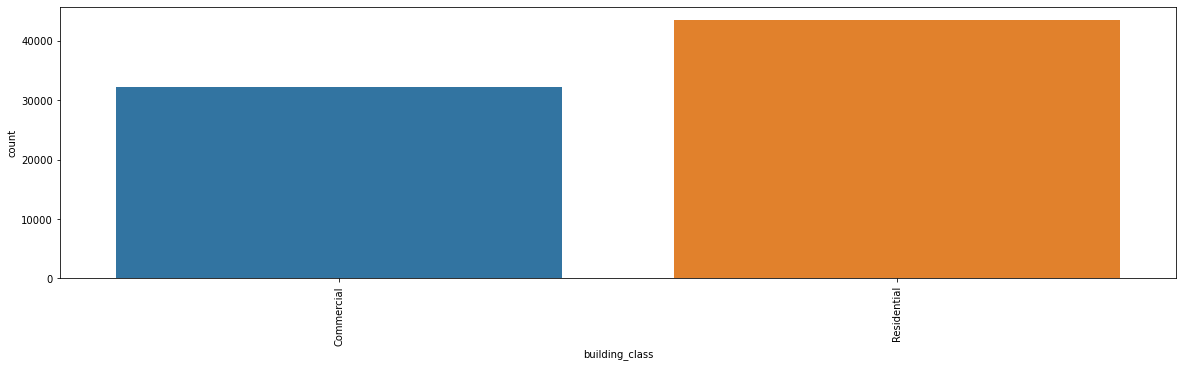

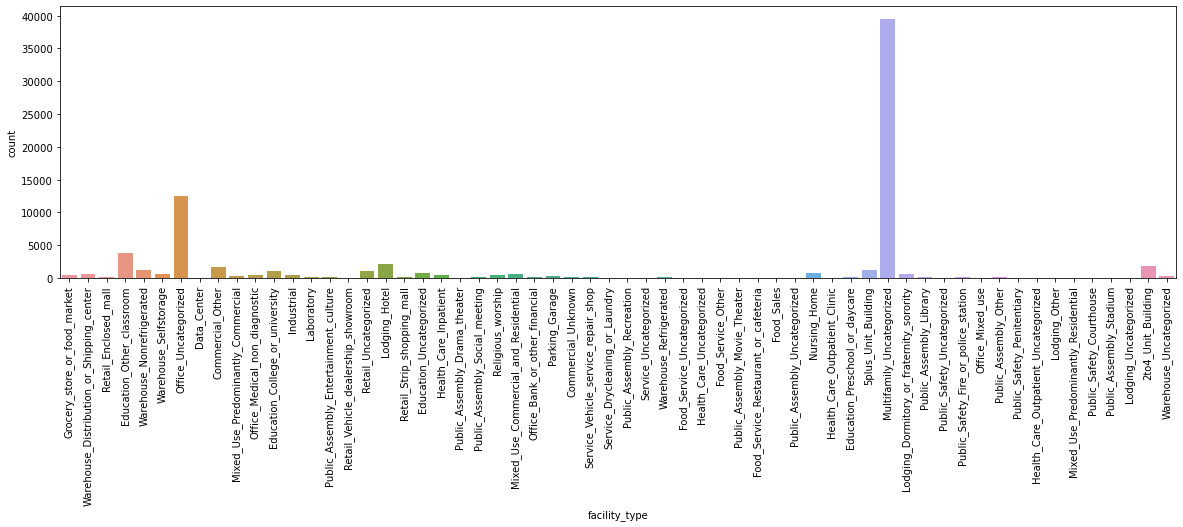

In [16]:
cat_plots(train_df)

### Test Set

Test set interpretations:

    1. state_11 dominates in the state_factor. 
    2. Multifamily_Uncategorized and Office_Uncategorized have dominated the facility_type feature. 
    3. Almost equal distribution of commercial and residential buildings, though Commercial surpasses in this case.

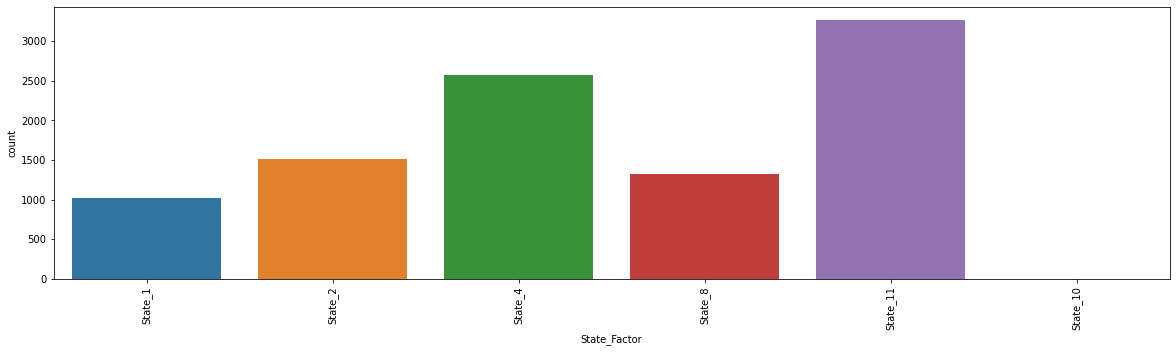

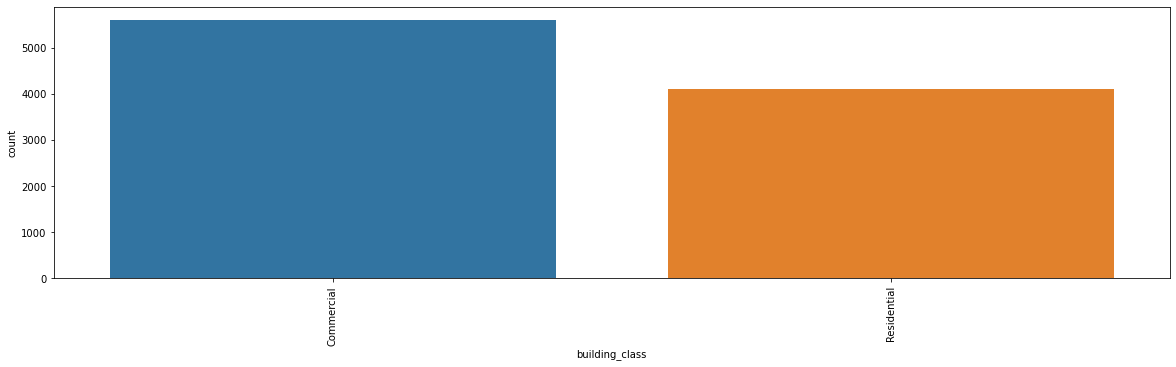

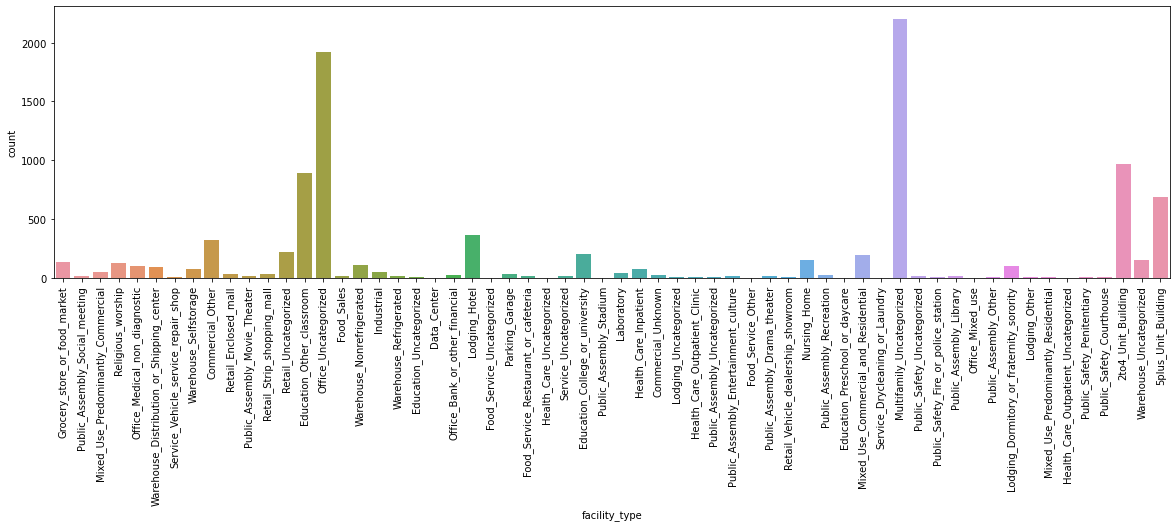

In [17]:
cat_plots(test_df)

Suprisingly there are no missing values in the categorical features of the datasets!

In [18]:
def missing(df, hex1, hex2, text):
    plt.figure(figsize=(15,5))
    sns.heatmap(df[cat_features].isna().values, cmap = [hex1, hex2], xticklabels=cat_features)
    plt.title('Missing values in {}'.format(text), fontsize=20)
    plt.show()

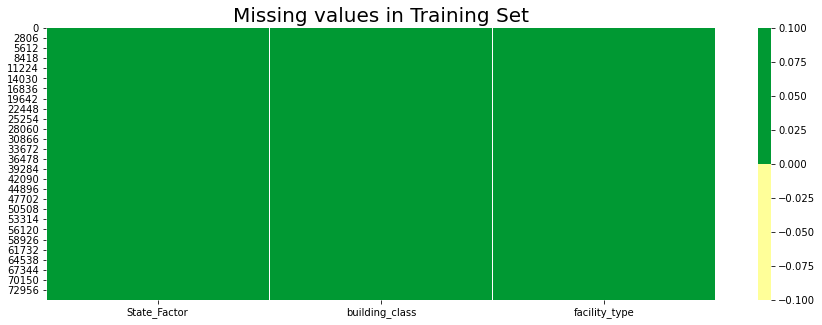

In [19]:
missing(train_df, '#ffff99', '#009933', 'Training Set')

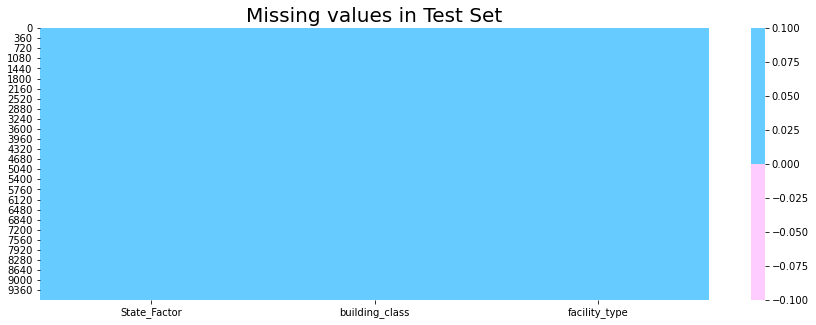

In [20]:
missing(test_df, '#ffccff',  '#66ccff', 'Test Set')

The below catplot shows the correlation of the categorical features with the target variable. We can infer that:

    1. state_4 has the highest energy consumption whereas state_11 has the least.
    2. There is a lot of variation in terms of energy consumptions among different facility type. 
    3. Commercial buildings consume more energy as compared to residential ones.

In [21]:
def catplot(df, color):
    for i, col in enumerate(['facility_type', 'State_Factor', 'building_class']):
        sns.catplot(x=col, y='site_eui', data=df, kind='point', aspect=3, color=color)
        plt.xticks(rotation=90)
        plt.show()

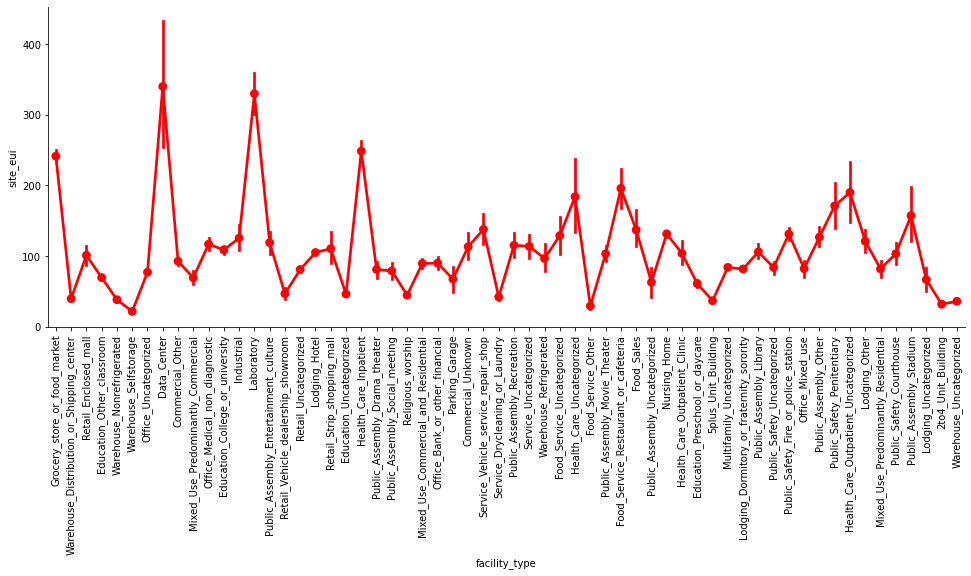

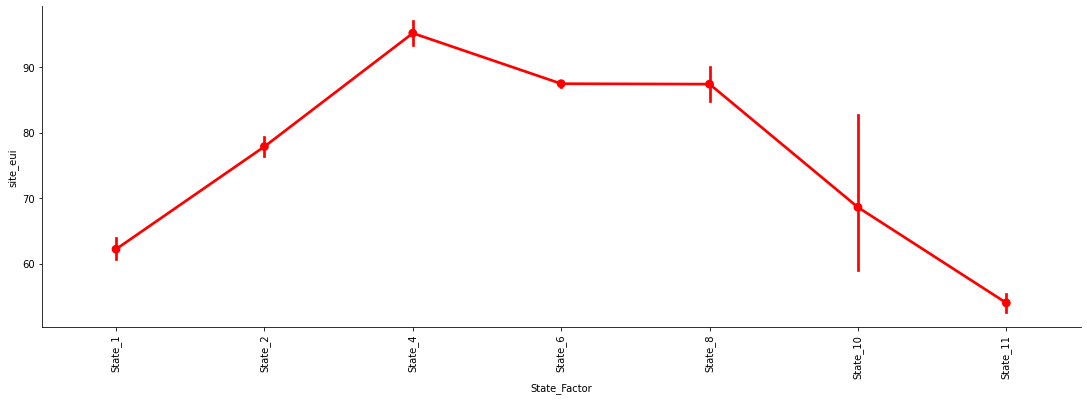

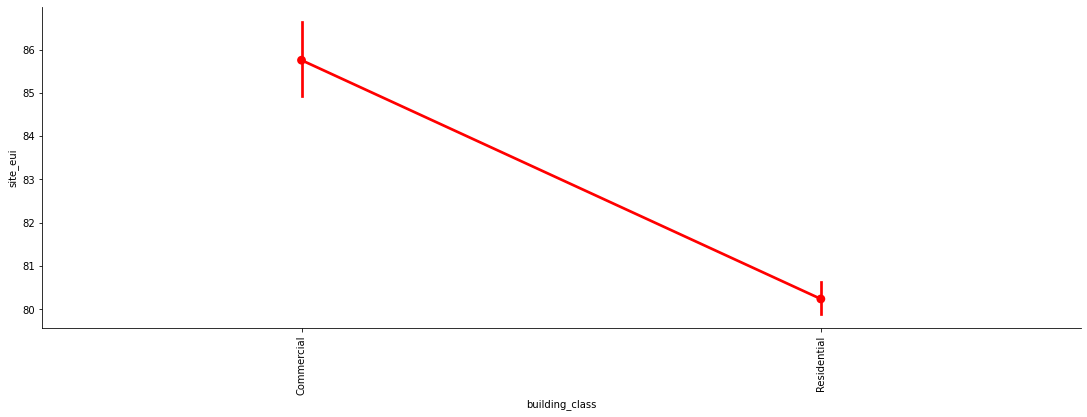

In [22]:
catplot(train_df, 'red')

# 3. Preprocessing

- Encoding Categorical Features
- Impute missing values
- Scale numerical feature
- Transformation

Before modeling we need to get our dataset ready. We we try to apply linear regression algorithm on dataset with missing values it will throw an error. Similarly, it is advisable to to have standardized features meaning all the features are brought to the same scale having mean as 0 and standard deviation as 1. This improves the model learning rate. Below, we will perform few operations to clean our data and make it ready for modelling

In [23]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler,OrdinalEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer

### Encoding the categorical features in both train and test set

In [24]:
def encoder(train, test):
    le = LabelEncoder()
    for col in train.columns:
        if train[col].dtypes == 'object':
            train[col] = le.fit_transform(train[col])
            le_dict = dict(zip(le.classes_, le.transform(le.classes_)))
            test[col] = test[col].apply(lambda x: le_dict.get(x, -1))
    return train, test

In [25]:
train_encoded, test_encoded = encoder(train_df, test_df)

In [26]:
train_encoded

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,0,0,13,61242.0,1942.0,11.0,2.4,36,50.500000,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,0,0,55,274000.0,1955.0,45.0,1.8,36,50.500000,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,0,0,48,280025.0,1951.0,97.0,1.8,36,50.500000,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,0,0,6,55325.0,1980.0,46.0,1.8,36,50.500000,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,0,0,56,66000.0,1985.0,100.0,2.4,36,50.500000,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,6,2,0,32,20410.0,1995.0,8.0,36.6,28,43.451613,...,25,3,0,0,NaN,NaN,NaN,NaN,132.918411,75752
75753,6,2,1,1,40489.0,1910.0,98.0,36.6,28,43.451613,...,25,3,0,0,NaN,NaN,NaN,NaN,39.483672,75753
75754,6,2,0,2,28072.0,1917.0,NaN,36.6,26,36.612903,...,6,0,0,0,NaN,NaN,NaN,NaN,48.404398,75754
75755,6,2,0,2,53575.0,2012.0,NaN,36.6,26,36.612903,...,6,0,0,0,NaN,NaN,NaN,NaN,592.022750,75755


In [27]:
test_encoded

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
0,7,0,0,13,28484.0,1994.0,37.0,2.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75757
1,7,0,0,13,21906.0,1961.0,55.0,45.7,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75758
2,7,0,0,13,16138.0,1950.0,1.0,59.1,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75759
3,7,0,0,13,97422.0,1971.0,34.0,35.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75760
4,7,0,0,13,61242.0,1942.0,35.0,1.8,38,50.596774,...,0,29,5,2,0,340.0,330.0,22.8,126.0,75761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9700,7,2,1,1,305925.0,2013.0,99.0,812.0,21,38.661290,...,0,39,3,0,0,NaN,NaN,NaN,NaN,85457
9701,7,2,1,1,34909.0,1910.0,94.0,26.5,21,38.661290,...,0,39,3,0,0,NaN,NaN,NaN,NaN,85458
9702,7,2,1,1,42393.0,2014.0,94.0,812.0,21,38.661290,...,0,39,3,0,0,NaN,NaN,NaN,NaN,85459
9703,7,2,1,1,25368.0,1992.0,79.0,812.0,21,38.661290,...,0,39,3,0,0,NaN,NaN,NaN,NaN,85460


In [28]:
final_train = train_encoded.copy()
final_test = test_encoded.copy()

## Analysing the numerical features

In [29]:
num_df = train_df[num_features]
num_df['site_eui'] = train_df['site_eui']
num_df.head()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.589286,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.589286,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


Degree of correlation:

    1. Perfect: If the value is near ± 1, then it said to be a perfect correlation.
    2. High degree: If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation.
    3. Moderate degree: If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation.
    4. Low degree: When the value lies below + .29, then it is said to be a small correlation.
    5. No correlation: When the value is zero.

In [30]:
corr_dict = num_df.corr(method='spearman').loc[:,'site_eui'].to_dict()

### As per the degree of correlation, we are dropping the features having correlation value less than +/-0.30 as they hardly have any effect on the target value

In [31]:
num_df.head()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.589286,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.589286,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [32]:
corr_dict

{'Year_Factor': -0.07311865024005786,
 'floor_area': 0.0914960491412691,
 'year_built': -0.0075687515825578425,
 'energy_star_rating': -0.6601744892918691,
 'ELEVATION': -0.012625032436582811,
 'january_min_temp': -0.23616291307011517,
 'january_avg_temp': -0.22780781418383536,
 'january_max_temp': -0.14299244707757133,
 'february_min_temp': -0.21226791754222993,
 'february_avg_temp': -0.24224338261946066,
 'february_max_temp': -0.2285283890474645,
 'march_min_temp': -0.21641637275582773,
 'march_avg_temp': -0.21570501493159186,
 'march_max_temp': -0.10493368770151469,
 'april_min_temp': -0.16615289899917668,
 'april_avg_temp': -0.13133291775435216,
 'april_max_temp': -0.13444873144142785,
 'may_min_temp': 0.05620508405806788,
 'may_avg_temp': 0.15374709214221868,
 'may_max_temp': 0.022749236389732513,
 'june_min_temp': 0.12154387288854655,
 'june_avg_temp': 0.15927892481157435,
 'june_max_temp': -0.040078032274884934,
 'july_min_temp': 0.22336834351755522,
 'july_avg_temp': 0.19816624

In [33]:
for i, val in corr_dict.items():
    if i != 'id':
        if (val < 0.3 and val>0.0) or (val > -0.3 and val<0):
            final_train.drop(i, axis=1, inplace=True)
            final_test.drop(i, axis=1, inplace=True)

In [34]:
final_train.head()

,State_Factor,building_class,facility_type,energy_star_rating,site_eui,id
0,0,0,13,11.0,248.682615,0
1,0,0,55,45.0,26.500150,1
2,0,0,48,97.0,24.693619,2
3,0,0,6,46.0,48.406926,3
4,0,0,56,100.0,3.899395,4


In [35]:
final_test.head()

,State_Factor,building_class,facility_type,energy_star_rating,id
0,0,0,13,37.0,75757
1,0,0,13,55.0,75758
2,0,0,13,1.0,75759
3,0,0,13,34.0,75760
4,0,0,13,35.0,75761


<AxesSubplot:>

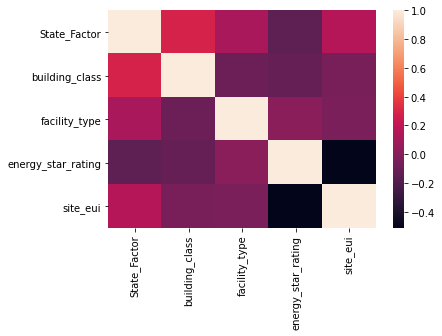

In [36]:
final = final_train.drop('id', axis=1)
sns.heatmap(final.corr())

# Check for missing values

In [37]:
final_train.isnull().sum()

State_Factor              0
building_class            0
facility_type             0
energy_star_rating    26709
site_eui                  0
id                        0
dtype: int64

In [38]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State_Factor        75757 non-null  int32  
 1   building_class      75757 non-null  int32  
 2   facility_type       75757 non-null  int32  
 3   energy_star_rating  49048 non-null  float64
 4   site_eui            75757 non-null  float64
 5   id                  75757 non-null  int64  
dtypes: float64(2), int32(3), int64(1)
memory usage: 2.6 MB


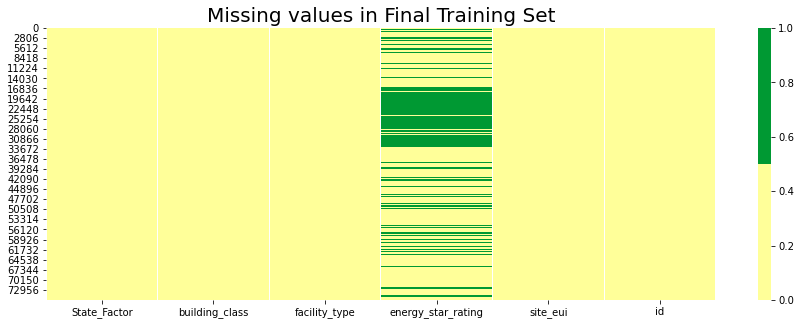

In [39]:
plt.figure(figsize=(15,5))
sns.heatmap(final_train.isna().values, cmap = ['#ffff99', '#009933'], xticklabels=final_train.columns)
plt.title('Missing values in {}'.format('Final Training Set'), fontsize=20)
plt.show()

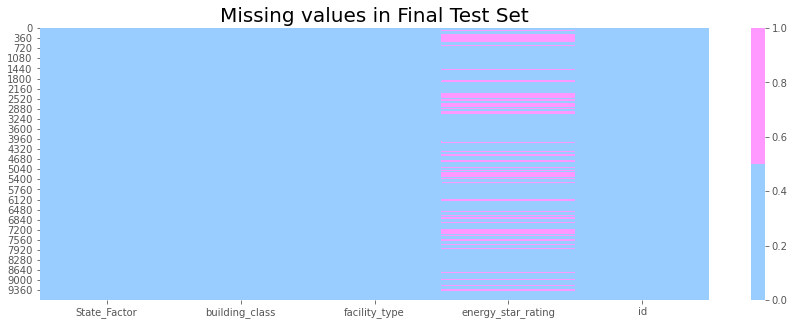

In [175]:
plt.figure(figsize=(15,5))
sns.heatmap(final_test.isna().values, cmap = ['#99ccff', '#ff99ff'], xticklabels=final_test.columns)
plt.title('Missing values in {}'.format('Final Test Set'), fontsize=20)
plt.show()

### Missing Value Imputation

In [41]:
final_train['energy_star_rating'].describe()

count    49048.000000
mean        61.048605
std         28.663683
min          0.000000
25%         40.000000
50%         67.000000
75%         85.000000
max        100.000000
Name: energy_star_rating, dtype: float64

<AxesSubplot:>

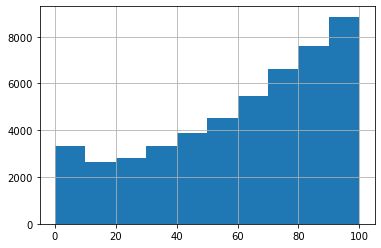

In [42]:
final_train['energy_star_rating'].hist()

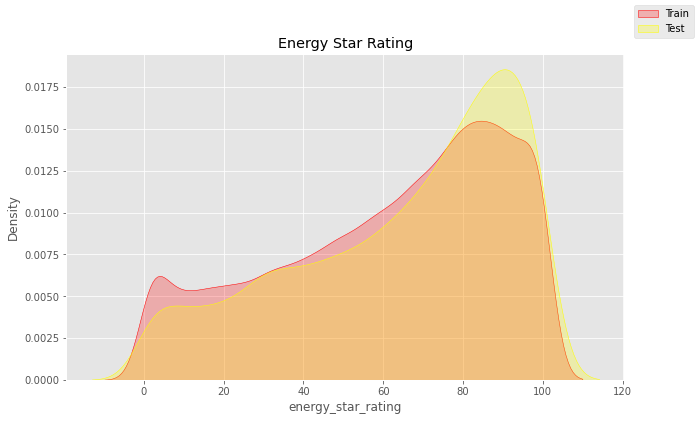

In [171]:
fig = plt.figure(figsize=(10,6))
sns.kdeplot(x="energy_star_rating",data=final_train,fill=True, color='red')
sns.kdeplot(x="energy_star_rating",data=final_test,fill=True, color='yellow')
fig.legend(labels=['Train','Test'])
plt.title('Energy Star Rating')
plt.show()

<AxesSubplot:xlabel='energy_star_rating'>

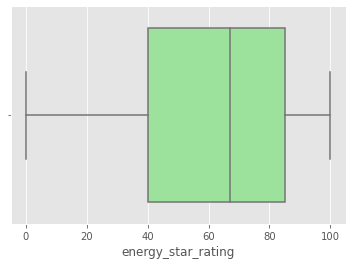

In [173]:
sns.boxplot(final_train['energy_star_rating'], color = 'lightgreen')

### Handling missing values

As we see from the above observations the energy_star_rating has no outliers and all the values lies within the range of 0 to 100. So, we will be using the mean to fill in the missing values.

In [45]:
final_train1 = final_train.copy()

In [46]:
final_train1['energy_star_rating']=final_train1['energy_star_rating'].fillna(final_train1['energy_star_rating'].mean())

In [47]:
final_train1.isnull().sum()

State_Factor          0
building_class        0
facility_type         0
energy_star_rating    0
site_eui              0
id                    0
dtype: int64

In [48]:
final_test1 = final_test.copy()

In [49]:
final_test1['energy_star_rating']=final_test1['energy_star_rating'].fillna(final_test1['energy_star_rating'].mean())

In [50]:
final_test1.isnull().sum()

State_Factor          0
building_class        0
facility_type         0
energy_star_rating    0
id                    0
dtype: int64

### Apply StandardScalar on numerical Features

In [51]:
scaler = StandardScaler()
num_feat = ['energy_star_rating']
final_train1[num_feat] = scaler.fit_transform(final_train1[num_feat])
final_test1[num_feat] = scaler.transform(final_test1[num_feat])

In [52]:
final_train1.head()

,State_Factor,building_class,facility_type,energy_star_rating,site_eui,id
0,0,0,13,-2.170027,248.682615,0
1,0,0,55,-0.695842,26.500150,1
2,0,0,48,1.558795,24.693619,2
3,0,0,6,-0.652483,48.406926,3
4,0,0,56,1.688870,3.899395,4


In [53]:
final_test1.head()

,State_Factor,building_class,facility_type,energy_star_rating,id
0,0,0,13,-1.042709,75757
1,0,0,13,-0.262258,75758
2,0,0,13,-2.603611,75759
3,0,0,13,-1.172784,75760
4,0,0,13,-1.129426,75761


## Transforming Target

## Before Transformation:

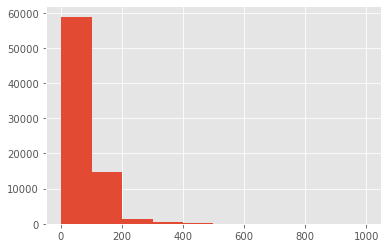

In [164]:
final_train1['site_eui'].hist()
plt.show()

## After Transformation:

## Comparison between log and square root transformation

From the below transformation we see that in this case the square root transformation has given a more normally distributed data than log transformation

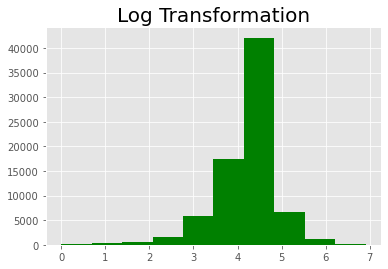

In [165]:
plt.hist(np.log(final_train1['site_eui']), color='green');
plt.title('Log Transformation', fontsize=20)
plt.show()

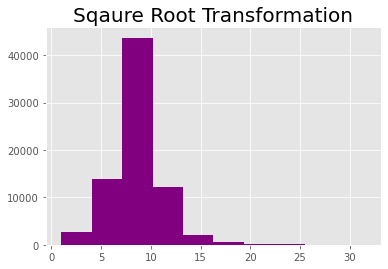

In [168]:
plt.hist(np.sqrt(final_train1['site_eui']), color='purple');
plt.title('Sqaure Root Transformation', fontsize=20)
plt.show()

# 4. Key takeaways from the analysis

    1. The original dataset had a total of 64 columns (62 indedpendent variables + 1 target variable + 1 id column)
    2. Only 3 categorical features with no missing values
    3. Disparity in the categorical features of test and train set(state_6 dominates in train unlike the test set)
    4. The numerical features (except energy_star_rating) doesn't contribute much in determining the target variable
    5. No outliers were detected in energy_star_rating though it has a lot of missing data
    6. From the heatmap we see that Energy_star_rating is highly correlated and Star_Factor is the least
    7. Square Root Transformation worked better than Log transformation in normalizing the data

# 5. Summary of Data Cleaning steps

    1. Categorical Features were Label Encoded
    2. After studying the correlation, most of the numerical features were dropped due to low effectiveness
    3. Missing Value Imputation for energy_star_rating
    4. Scaled Numerical Features
    5. Log transformation of the target variable

# 6. Modelling

### Base Model's Library Import

In [ ]:
from helper import (plot_exponential_data, 
                    plot_square_normal_data)
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)
from sklearn.metrics import mean_squared_error

### Train CV split for cross validation

We are splitting our training set into train and test data to verify the model's performance. Firstly, we are creating x and y.
x is a dataframe of predictors and y is our target variable set.

train_test_split always divides the dataframe into 2 parts in the given ratio. Here we have splitted into 4:1.

In [73]:
from sklearn.model_selection import train_test_split

X= final_train1.drop('site_eui',axis=1)
y= final_train1['site_eui']
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42)

### Function to build model

In [138]:
def model(obj):
    obj.fit(x_train, y_train)
    obj_y_pred = lreg.predict(x_test)
    mean_squared_error = np.mean((obj_y_pred - y_test)**2)
    obj_coefficient = pd.DataFrame()
    obj_coefficient["Columns"] = x_train.columns
    obj_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_)
    return obj_coefficient, mean_squared_error

### Function to visualize the coefficient values

In [139]:
def visualize(obj_coeff, title, color):
    fig, ax = plt.subplots(figsize =(20, 8))

    ax.bar(lreg_coefficient["Columns"],
    obj_coeff['Coefficient Estimate'],
    color = color)
    ax.spines['bottom'].set_position('zero')
    plt.title(title, fontsize=25) 
    plt.style.use('ggplot')
    plt.show()

### Linear regression

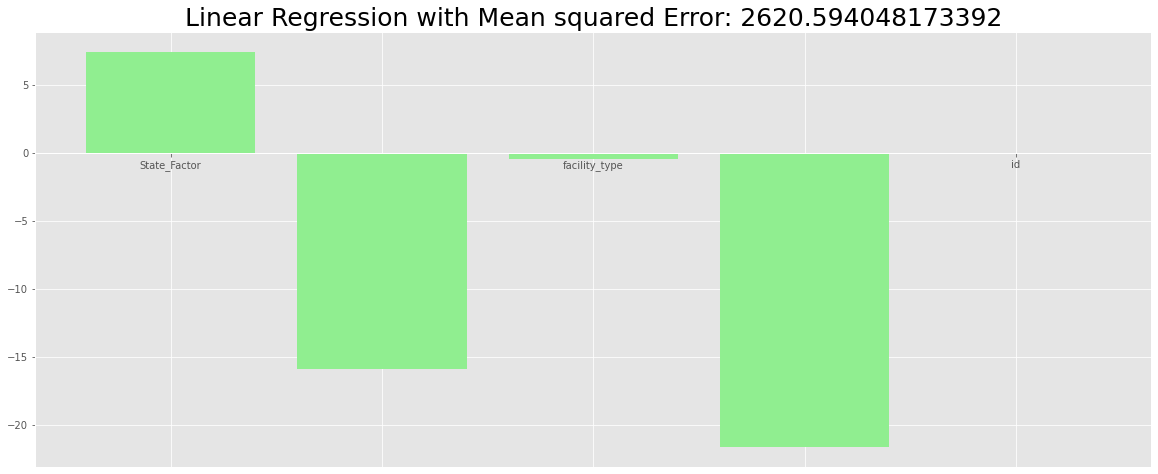

In [150]:
lreg = LinearRegression()
lreg_coefficient, lreg_mse = model(lreg)
visualize(lreg_coefficient, 'Linear Regression with Mean squared Error: {}'.format(lreg_mse), 'lightgreen')

### Lasso Regression

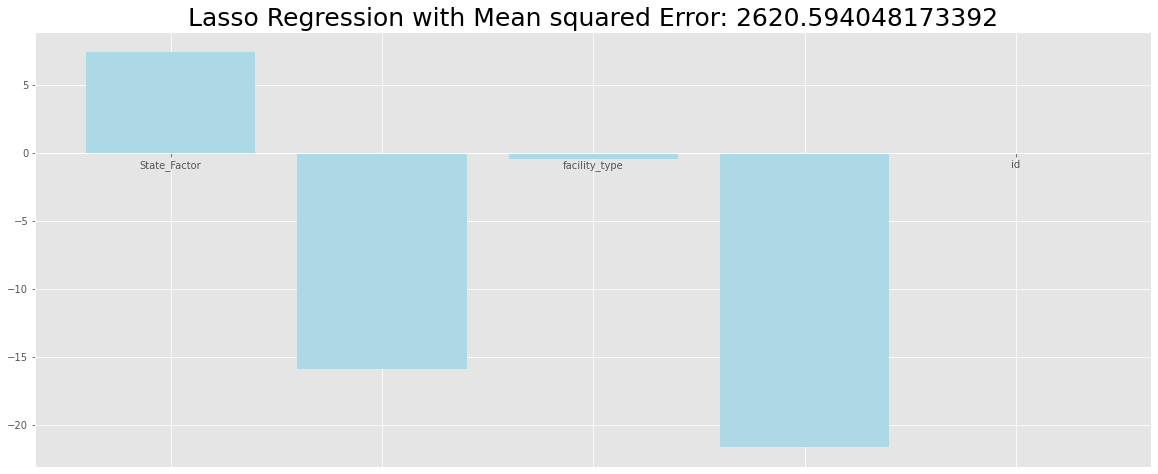

In [157]:
lasso = Lasso(alpha = 100000000000000)
lasso_coefficient, lasso_mse = model(lasso)
visualize(lasso_coefficient, 'Lasso Regression with Mean squared Error: {}'.format(lasso_mse), 'lightblue')

### Ridge Regression

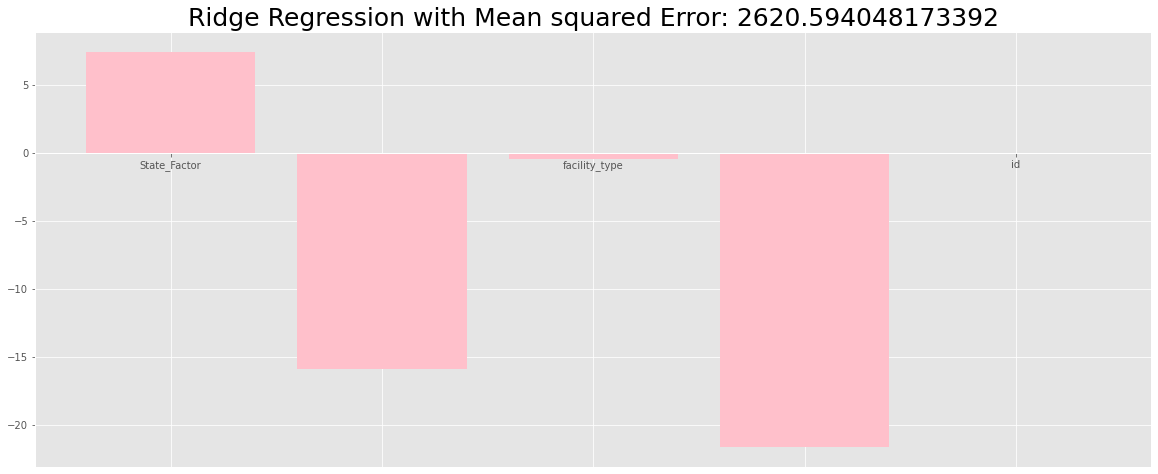

In [156]:
ridge = Ridge(alpha = 1)
ridge_coefficient, ridge_mse = model(lasso)
visualize(ridge_coefficient, 'Ridge Regression with Mean squared Error: {}'.format(ridge_mse), 'pink')

## Tuning the alpha values and checking the variations in Lasso Regression

In [181]:
alpha= [10 ** x for x in range(-6,8)]
cv_error_array=[]
for i in alpha:
    reg= Lasso(alpha=i,random_state=42)
    reg.fit(X_train,y_train)
    y_pred= reg.predict(x_test)
    loss= mean_squared_error(y_test,y_pred)
    cv_error_array.append(loss)
    print("For Alpha : ", i ,"Loss :",round(loss,2))

For Alpha :  1e-06 Loss : 2620.59
For Alpha :  1e-05 Loss : 2620.59
For Alpha :  0.0001 Loss : 2620.59
For Alpha :  0.001 Loss : 2620.59
For Alpha :  0.01 Loss : 2620.59
For Alpha :  0.1 Loss : 2620.66
For Alpha :  1 Loss : 2627.71
For Alpha :  10 Loss : 2822.37
For Alpha :  100 Loss : 3262.87
For Alpha :  1000 Loss : 3262.89
For Alpha :  10000 Loss : 3263.22
For Alpha :  100000 Loss : 3265.58
For Alpha :  1000000 Loss : 3265.58
For Alpha :  10000000 Loss : 3265.58


# 7. Key Findings:

- We found that for the considered scenario all the models performed similarly

- The Lasso Regression Model's performace was best with alpha=0.1. The performance didn't improve on reducing the hyperparameter beyond 1. But as we increase the alpha value the performance deteriorates gradually upto 100000 beyond which it remains constant.

- There wasn't any difference in the mse and the coefficients of various regression model

- We can try elastic regression model as well and compare the results

- We can consider the Linear Regression model as our base model and further try to reduce the MSE 

# 8. Future Plan of Action

Following points can be considered while remodelling:

    1. Instead of Label Encoding we can try using on-hot or dummy encoding techniques
    2. Missing Value Imputation for energy_star_rating can be done using median or by filling with regression model
    3. We can consider other features which were dropped due to low correlation values
    4. Try Sqrt or Box cox instead of Log transformation of target variable
    5. We can also compare the performance by training our model with ElasticNet
    5. Try out other modelling algorithms like Random Forest
    
We can consider this as our base model and keep building on top of this by tweaking the hyperparameters and chaning the data cleaning techniques. Also, we can compare different algorithms' performance to come up with the best one.